# Lab - Texture Analysis

## Part A

### Objective

The goal of this part is to segment the following photo into 3 segments: 
1. a segment for clothes with a jeans texture
2. a segment for clothes with a cotton texture
3. a segment for the background

<img src='test.jpg' width=100px heigth=300px></img>

In [11]:
# All the imports you will need in the whole lab
from skimage.feature import graycomatrix, graycoprops
from skimage import io
from skimage.exposure import histogram
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from commonfunctions import *
import os
import numpy as np

## Section 1

In this section, you will extract features from image samples of the jeans and cotton texture using GLCM, then we will plot our feature space to see if our features are able to differentiate between the textures of jeans, cotton, and background. 

### TODO Implement get_glcm_features

You will need the following two functions:

greycomatrix, doc link -> https://scikit-image.org/docs/dev/api/skimage.feature.html#greycomatrix <br>
greycoprops, doc link -> https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycoprops

In [2]:
def get_glcm_features(gray_scale_img):
    """
    Given a grayscale image with graylevels from 0 - 255, this function returns the contrast
    and the homogeneity features of the image with the help of GLCM
    """
    
    greycomatrix_img = graycomatrix(gray_scale_img, [1], [7*np.pi/4], 256, normed=True)
    contrast = graycoprops(greycomatrix_img, 'contrast')
    homogeneity = graycoprops(greycomatrix_img, 'homogeneity')
    
    # Tip: Make sure you understand
    # not doing that results in bugs that make you believe the lab is long
    
    return contrast, homogeneity

The following part will extract the contrast and homogeneity of samples of jeans and cotton in the folder "imgs_patches" using your function. So, for each sample image, we will have a point in a 2D feature space. Then, it will plot this feature space.

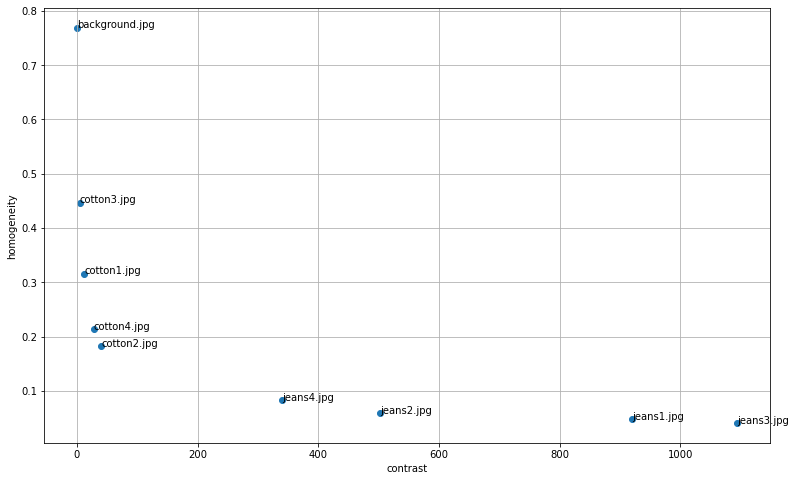

In [3]:
def get_fname_images_tuple(directory):
    fnames = os.listdir(directory)
    to_return = []
    for fn in fnames:
        if fn[-3:] == 'jpg':
            path = os.path.join(directory, fn)
            gray_scale_image = (rgb2gray(io.imread(path)) * 255).astype(np.uint8)
            to_return.append((fn, gray_scale_image))
        else:
            print('This file has been skipped', fn)
    return to_return

# You don't need to understand how this function works
def plot_2d_features_with_names(names_fts_list, xlabel, ylabel):
    x = [names_fts[1][0] for names_fts in names_fts_list]
    y = [names_fts[1][1] for names_fts in names_fts_list]
    txts = [names_fts[0] for names_fts in names_fts_list]
    
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(txts):
        ax.annotate(txt, (x[i], y[i]))
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig = plt.gcf()
    fig.set_size_inches(13, 8)
    
    
fn_img_list = get_fname_images_tuple(r'imgs_patches')

fn_ft_list = []
for fn, img in fn_img_list:
    fn_ft_list.append((fn, get_glcm_features(img)))
    # print(get_glcm_features(img))
    
plot_2d_features_with_names(fn_ft_list, 'contrast', 'homogeneity')

## Section 2

You should have noticed that the previous section showed us that we can differentiate between jeans, cotton, & background patches using contrast and homogeneity. So, in this section, we will classify an unknown patch into one of those categories using a simple rule-based classifier. This will make us able to segment an image.

In [4]:
# TODO implement this function

def classify_patch(contrast, homogeneity):
    """
    Given the contrast and homogeneity values of a certain image patch, this function 
    will return the class of the patch, i.e either 'jeans', 'cotton', or 'background'
    """
    
    
    if  contrast>200 and homogeneity < 0.2:
        return 'jeans'
    elif contrast <200 and homogeneity >0.2 and homogeneity < 0.7:
        return 'cotton'
    else:
        return 'background'
    # We can decide whether the patch is background or not by simply checking 'if' the homogeneity is greater than a certain float value

### TODO Complete todos in segment_img

This function is given an RGB image, and returns the segmented image coloring jeans patches in green, cotton patches in red, and the background in blue. Your final output should look like the following image:

<img src='target_output.jpg' width=100px heigth=300px></img>

In [5]:
def segment_img(image):
    img = image.copy()
    patch_height = patch_width = 50
    
    # TODO complete the following skeleton
    
    # loop on the image patch by patch
    # <Outer loop>
    for i in range(0, img.shape[0], patch_height):
        
        # <Inner loop>
        for j in range(0, img.shape[1], patch_width):
            
            #<get the corresponding image patch>
            patch = img[i:i+patch_height, j:j+patch_width]
            patch_grayscale = (rgb2gray(patch) * 255).astype(np.uint8)
            
            # <get the features of patch_grayscale>
            contrast, homogeneity = get_glcm_features(patch_grayscale)
            # <get the classification of patch_grayscale>
            
            
            classification = classify_patch(contrast, homogeneity)
            if classification == 'cotton':
                patch[:,:, 0] = 255
            elif classification == 'jeans':
                patch[:,:, 1] = 255
            else:
                patch[:,:,2] = 255
                
    return img

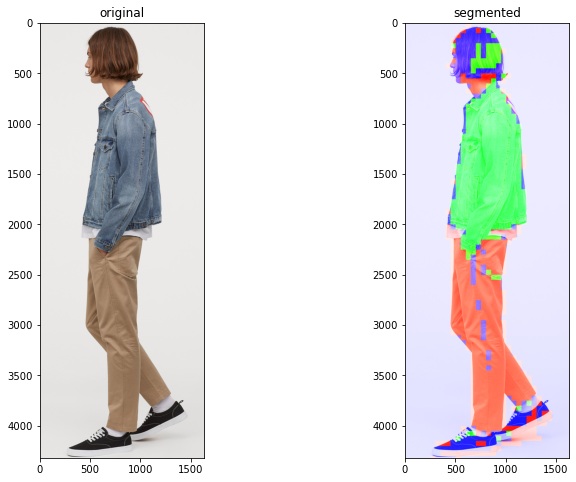

In [12]:
# Testing your work
image = io.imread('test.jpg')
segmented_image = segment_img(image)
show_images([image,segmented_image],["original","segmented"])

## Part B

You are required to implement your own function that computes the LBP histogram of a grayscale image (return to lecture slides for reference attached in this lab folder).

#### Note: you are allowed to ignore image border pixels.

In [7]:
def get_lbp_hist(grayscale_img):
    img = grayscale_img.copy()
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            hist  = 0
            if grayscale_img[i, j] < grayscale_img[i-1,j-1]:
                hist +=128
            if grayscale_img[i, j] < grayscale_img[i-1,j]:
                hist +=64
            if grayscale_img[i, j] < grayscale_img[i-1,j+1]:
                hist +=32
            if grayscale_img[i, j] < grayscale_img[i,j+1]:
                hist +=16
            if grayscale_img[i, j] < grayscale_img[i+1,j+1]:
                hist +=8
            if grayscale_img[i, j] < grayscale_img[i+1,j]:
                hist +=4
            if grayscale_img[i, j] < grayscale_img[i+1,j-1]:
                hist +=2
            if grayscale_img[i, j] < grayscale_img[i,j-1]:
                hist +=1
            img[i,j] = hist
            # print(img[i, j])
    #create histogram
    # print(img)
    hist = histogram(img)
    
    return hist[0]
    # return <LBP histogram which is a list of 256 numbers>

(467, 410)
[16178  1512  1101  1686  6900   393  2038  2039  1164   195   179   307
  1865   165   988  1094  1626   194   165   236   380    31   163   171
  1700   231   256   408  2002   153   980   979  1196   167   180   215
   895    81   430   417    84    18    19    31   223    20   167   223
  1631   197   229   281   734    72   397   369  1665   204   325   562
  2195   219  1449  1740  6810   379   890   722   717    29   432   256
   907    68   296   242   327    26   316   241   380    29    70    56
    29     1    21    13   704    59   257   296   258    20   239   207
  1974   181   485   365   341    19   356   265   277    26   105    96
   220    22   263   237  2134   172   451   355   265    11   280   176
  2172   198   811   965  1257   111  1405  1416  1131  1725    91  1722
   910   746   274  2288   173   263    23   305   480   473   182  1518
   175   213    21   228    83    63    26   197   255   310    31   461
   453   412   197  1555   203   256    

'ignore function output'

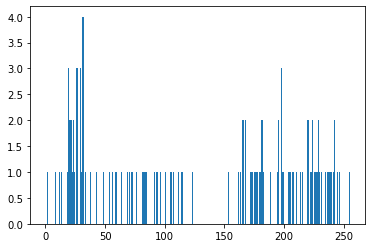

In [8]:
# Testing your work, we will compare your histogram with that of ours
# There should be a noticable difference between the histograms of jeans and cotton
img = rgb2gray(io.imread(r'imgs_patches\jeans1.jpg'))
print(img.shape)

hist = get_lbp_hist(img)

print(hist)
# print(np.count_nonzero(hist))
# print(len(hist))
plt.hist(hist, bins=range((2 ** 8)))
'ignore function output'

(371, 374)
[13381  2576  1025  2354  2158   139  2120  2599   959   162    67   120
  2152   151  2616  2288  2679   197   175   133   140     7   178    70
  2263   141   103   147  2839    93  2456   952   989   167   170   293
   159     3   274   251    67    20     8    19   112    12   240   228
  2267   141   274   184   150     3   281   119  2411   102   204   195
  2010    40  2433   962  2160   145   111   160   181     5   132    56
   129     9    11     7   124     4   127    57   139     8     7     6
     6     0     3     5   157     4    10     6    62     2    41    20
  2128   187   248   277   119     2   231   136   123    10    18     6
   150     4   224   117  2676    73   266   122    69     1   126    33
  1981    40   184    83  1025    15  1085   235  1015  2504    66  2459
   122   145   107  1989   207   255     7   188   257   279   255  2394
   164   153    11   103     4     5     7    37   271   195    16   189
   282   124   200   921    59    94    

'ignore function output'

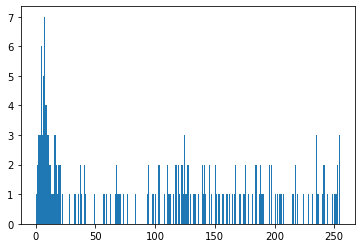

In [9]:
# Testing your work, we will compare your histogram with that of ours
# There should be a noticable difference between the histograms of jeans and cotton
img = rgb2gray(io.imread(r'imgs_patches\cotton1.jpg'))
print(img.shape)
hist = get_lbp_hist(img)
print(hist)
plt.hist(hist, bins=range((2 ** 8)))
'ignore function output'